<a href="https://colab.research.google.com/github/manuelaniero/Estudos-em-Data-Science/blob/main/Desafio1_Projeto_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 1

## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [ ]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [ ]:
dados_paises_covid.rename(columns={"Province/State": "province",
                                   "Country/Region": "country"},
                          inplace=True)

In [ ]:
dados_paises_covid_dead.rename(columns={"Province/State": "province",
                                        "Country/Region": "country"},
                               inplace=True)

In [ ]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [ ]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                             var_name = 'date',
                                             value_name = 'infected')

In [ ]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                                       var_name = 'date',
                                                       value_name = 'dead')

In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [ ]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [ ]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
                                            infer_datetime_format='True')

In [ ]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
                                                 infer_datetime_format='True')

In [ ]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [ ]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [ ]:
dados_paises_covid.shape

(330327, 6)

In [ ]:
dados_paises_covid_dead.shape

(330327, 6)

In [ ]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead,
                       on = ['province', 'country',	'Lat',	'Long',	'date'],
                       how = 'inner')

In [ ]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [ ]:
dados_covid.shape

(330327, 7)

## Questão 1

In [ ]:
dados_covid.groupby('country').agg(xx = pd.NamedAgg('infected', 'sum'))

,xx
country,
Afghanistan,129988469
Albania,185562654
Algeria,182741650
Andorra,24547525
Angola,60025203
...,...
West Bank and Gaza,412543696
Winter Olympics 2022,214462
Yemen,7879435


In [ ]:
dados_covid.groupby('country').count()

,province,Lat,Long,date,infected,dead
country,,,,,,
Afghanistan,0,1143,1143,1143,1143,1143
Albania,0,1143,1143,1143,1143,1143
Algeria,0,1143,1143,1143,1143,1143
Andorra,0,1143,1143,1143,1143,1143
Angola,0,1143,1143,1143,1143,1143
...,...,...,...,...,...,...
West Bank and Gaza,0,1143,1143,1143,1143,1143
Winter Olympics 2022,0,1143,1143,1143,1143,1143
Yemen,0,1143,1143,1143,1143,1143


In [ ]:
len(dados_covid['country'].unique())

201

## Questão 2

In [ ]:
dados_covid[dados_covid['country'].isin(['Brazil', 'US', 'Italy'])].groupby('country').agg(infected = pd.NamedAgg('infected', 'sum'))

,infected
country,
Brazil,21182690594
Italy,10083161678
US,53813184406


In [ ]:
dados_covid[dados_covid['country'].isin(['Brazil', 'US', 'Italy'])]

,province,country,Lat,Long,date,infected,dead
31,NaN,Brazil,-14.23500,-51.92530,2020-01-22,0,0
154,NaN,Italy,41.87194,12.56738,2020-01-22,0,0
260,NaN,US,40.00000,-100.00000,2020-01-22,1,0
320,NaN,Brazil,-14.23500,-51.92530,2020-01-23,0,0
443,NaN,Italy,41.87194,12.56738,2020-01-23,0,0
...,...,...,...,...,...,...,...
329903,NaN,Italy,41.87194,12.56738,2023-03-08,25603510,188322
330009,NaN,US,40.00000,-100.00000,2023-03-08,103755771,1123246
330069,NaN,Brazil,-14.23500,-51.92530,2023-03-09,37076053,699276
330192,NaN,Italy,41.87194,12.56738,2023-03-09,25603510,188322


In [ ]:
max_date = np.max(dados_covid['date'])
max_date

Timestamp('2023-03-09 00:00:00')

In [ ]:
selected_country = ['Brazil', 'US', 'Italy']

#selected_country = ['Brazil', 'US', 'Canada']

In [ ]:
dados_covid[(dados_covid['date'] == max_date) & (dados_covid['country'].isin(selected_country))]

,province,country,Lat,Long,date,infected,dead
330069,NaN,Brazil,-14.23500,-51.92530,2023-03-09,37076053,699276
330192,NaN,Italy,41.87194,12.56738,2023-03-09,25603510,188322
330298,NaN,US,40.00000,-100.00000,2023-03-09,103802702,1123836


## Questão 3

In [ ]:
max_date = np.max(dados_covid['date'])

In [ ]:
dados_filtrados = dados_covid[dados_covid['date'] == max_date]

In [ ]:
dados_filtrados

,province,country,Lat,Long,date,infected,dead
330038,NaN,Afghanistan,33.939110,67.709953,2023-03-09,209451,7896
330039,NaN,Albania,41.153300,20.168300,2023-03-09,334457,3598
330040,NaN,Algeria,28.033900,1.659600,2023-03-09,271496,6881
330041,NaN,Andorra,42.506300,1.521800,2023-03-09,47890,165
330042,NaN,Angola,-11.202700,17.873900,2023-03-09,105288,1933
...,...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057


In [ ]:
dados_filtrados.groupby('country') \
               .agg(infected = pd.NamedAgg('infected', 'sum'),
                    dead = pd.NamedAgg('dead', 'sum')) \
               .sort_values('infected', ascending = False) \
               .head(10)

,infected,dead
country,,
US,103802702,1123836
India,44690738,530779
France,39866718,166176
Germany,38249060,168935
Brazil,37076053,699276
Japan,33320438,72997
"Korea, South",30615522,34093
Italy,25603510,188322
United Kingdom,24658705,220721


In [ ]:
dados_filtrados.groupby('country') \
               .agg(infected = pd.NamedAgg('infected', 'sum'),
                    dead = pd.NamedAgg('dead', 'sum')) \
               .sort_values('dead', ascending = False) \
               .head(10)

,infected,dead
country,,
US,103802702,1123836
Brazil,37076053,699276
India,44690738,530779
Russia,22075858,388478
Mexico,7483444,333188
United Kingdom,24658705,220721
Peru,4487553,219539
Italy,25603510,188322
Germany,38249060,168935


## Questão 4

In [ ]:
max_date = np.max(dados_covid['date'])

In [ ]:
dados_filtrados = dados_covid[dados_covid['date'] == max_date]

In [ ]:
dados_resumo = dados_filtrados.groupby('country') \
                              .agg(infected = pd.NamedAgg('infected', 'sum'),
                                   dead = pd.NamedAgg('dead', 'sum')) \
                              .reset_index()

In [ ]:
dados_resumo['taxa_mortalidade'] = dados_resumo['dead'] / dados_resumo['infected']

In [ ]:
dados_resumo.sort_values('taxa_mortalidade', ascending = False).head(10)

,country,infected,dead,taxa_mortalidade
93,"Korea, North",1,6,6.000000
107,MS Zaandam,9,2,0.222222
198,Yemen,11945,2159,0.180745
169,Sudan,63829,5017,0.078601
174,Syria,57467,3164,0.055058
164,Somalia,27324,1361,0.049810
141,Peru,4487553,219539,0.048922
54,Egypt,515759,24812,0.048108
117,Mexico,7483444,333188,0.044523
22,Bosnia and Herzegovina,401729,16280,0.040525


## Questão 5

In [ ]:
dados_covid

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0
...,...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057


In [ ]:
dados_resumo_paises = dados_covid.groupby(['date', 'country']) \
                                 .agg(infected = pd.NamedAgg('infected', 'sum'),
                                      dead = pd.NamedAgg('dead', 'sum')) \
                                 .reset_index()

In [ ]:
dados_covid

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0
...,...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057


In [ ]:
dados_resumo_paises

,date,country,infected,dead
0,2020-01-22,Afghanistan,0,0
1,2020-01-22,Albania,0,0
2,2020-01-22,Algeria,0,0
3,2020-01-22,Andorra,0,0
4,2020-01-22,Angola,0,0
...,...,...,...,...
229738,2023-03-09,West Bank and Gaza,703228,5708
229739,2023-03-09,Winter Olympics 2022,535,0
229740,2023-03-09,Yemen,11945,2159
229741,2023-03-09,Zambia,343135,4057


a) evolucao infectados br x us

In [ ]:
selected_country = ['Brazil', 'US']

In [ ]:
dados_resumo_paises_filtrados = dados_resumo_paises[dados_resumo_paises['country'].isin(selected_country)]

In [ ]:
dados_resumo_paises_filtrados = dados_resumo_paises_filtrados.pivot(index = 'date', columns='country', values='infected')

<Axes: xlabel='date'>

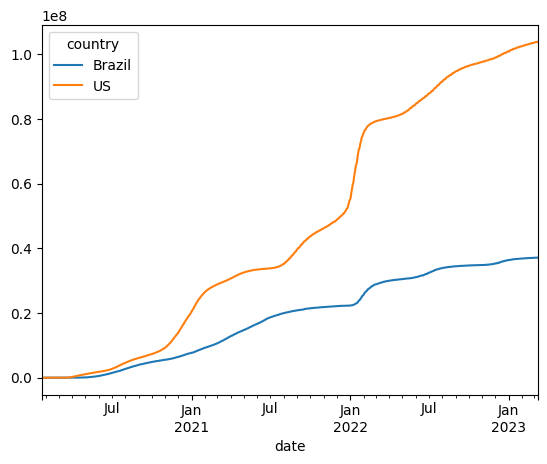

In [ ]:
dados_resumo_paises_filtrados.plot.line()

b) evolucao mortos

In [ ]:
selected_country = ['Brazil', 'US']

In [ ]:
dados_resumo_paises_filtrados = dados_resumo_paises[dados_resumo_paises['country'].isin(selected_country)]

In [ ]:
dados_resumo_paises_filtrados = dados_resumo_paises_filtrados.pivot(index = 'date', columns='country', values='dead')

<Axes: xlabel='date'>

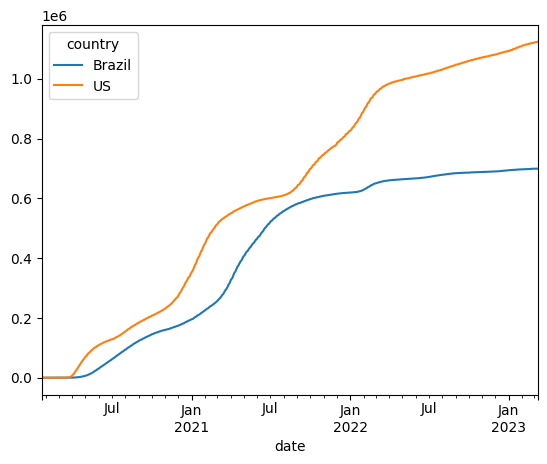

In [ ]:
dados_resumo_paises_filtrados.plot.line()

c) comparacao br x us infectados

In [ ]:
selected_country = ['Brazil', 'US']

In [ ]:
date_filter = '2021-03-20'

In [ ]:
dados_resumo_paises_filtrados = dados_resumo_paises[(dados_resumo_paises['date'] == date_filter) & \
                                                    (dados_resumo_paises['country'].isin(selected_country))]

<Axes: xlabel='country'>

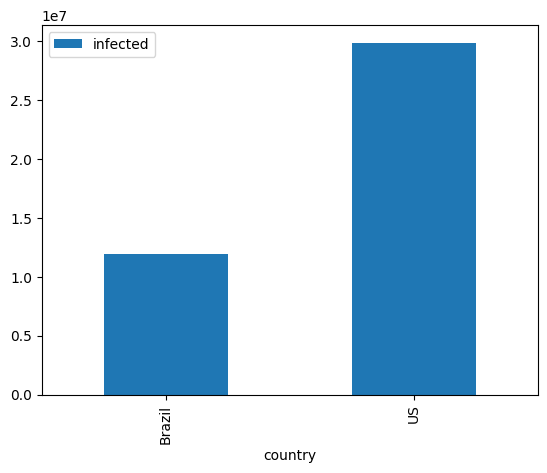

In [ ]:
dados_resumo_paises_filtrados.plot.bar(x = 'country', y = 'infected')

d) comparacao br x us mortos

<Axes: xlabel='country'>

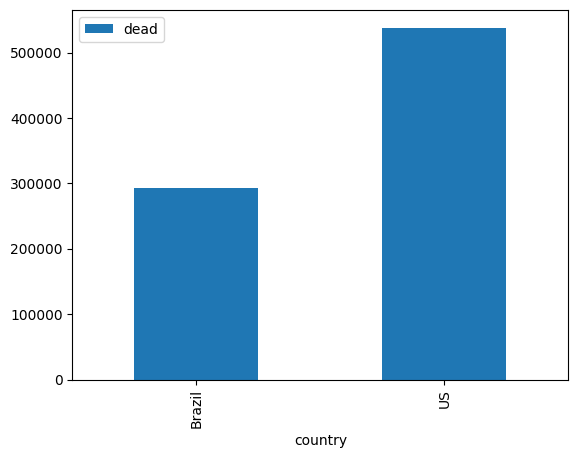

In [ ]:
dados_resumo_paises_filtrados.plot.bar(x = 'country', y = 'dead')

e) comparacao taxa

In [ ]:
dados_resumo_paises_filtrados['taxa_mortalidade'] = dados_resumo_paises_filtrados['dead'] / dados_resumo_paises_filtrados['infected']

<ipython-input-61-d55b791264c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_resumo_paises_filtrados['taxa_mortalidade'] = dados_resumo_paises_filtrados['dead'] / dados_resumo_paises_filtrados['infected']


In [ ]:
dados_resumo_paises_filtrados

,date,country,infected,dead,taxa_mortalidade
85047,2021-03-20,Brazil,11958814,293076,0.024507
85209,2021-03-20,US,29903121,538385,0.018004


<Axes: xlabel='country'>

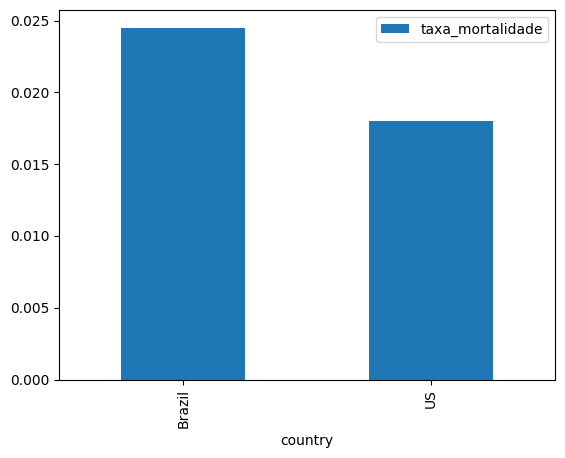

In [ ]:
dados_resumo_paises_filtrados.plot.bar(x = 'country', y = 'taxa_mortalidade')